## Quinto/Sexto Desafío: `Daruich`, Nicolas Alberto
----

In [1]:
# TODO Aplicar las correciones al abstracto

## Abstracto
Este proyecto de ciencia de datos se enfoca en prever el síndrome metabólico, destacando la accesibilidad de las poderosas herramientas de la ciencia de datos para cualquier persona interesada. Su propósito principal es demostrar que contribuir al ámbito médico no está reservado exclusivamente a expertos investigadores, ya que las capacidades de análisis de datos están al alcance de todos.

En este contexto, el proyecto no solo representa la aplicación de la ciencia de datos en el campo clínico específico del síndrome metabólico, sino que también subraya la importancia de la inclusividad en la generación de conocimiento. Fomenta la participación de individuos de diversas disciplinas en la investigación científica, abriendo nuevas oportunidades para contribuir a la comprensión y abordaje de condiciones médicas críticas.

El síndrome metabólico, abordado en este proyecto, es una condición que involucra varios factores de riesgo cardiovascular. La recopilación de un conjunto de datos completo, que incluye información sobre índice de masa corporal, niveles de glucosa, colesterol y otros indicadores clave, respalda el desarrollo de un modelo predictivo. Este enfoque, además de sus implicaciones médicas, sirve como un ejemplo tangible de cómo la ciencia de datos puede democratizarse, permitiendo que diversos perfiles contribuyan a la mejora de la salud y la investigación médica.

## Variables de Interes
- `Age` (Edad): Variable numérica que representa la edad de los individuos en el estudio.
- `Sex` (Sexo): Variable categórica que indica el género del individuo (por ejemplo, masculino o femenino).
- `Marital` (Estado Civil): Variable categórica que describe el estado civil de los participantes (soltero, casado, divorciado, etc.).
- `Income` (Ingresos): Variable numérica que representa el nivel de ingresos de los participantes.
- `Race` (Etnia): Variable categórica que indica la etnia de los participantes.
- `WaistCirc` (Circunferencia de la Cintura): Variable numérica que mide la circunferencia de la cintura.
- `BMI` (Índice de Masa Corporal): Variable numérica que calcula el índice de masa corporal.
- `Albuminuria` (Albuminuria): Variable que indica la presencia de proteínas en la orina, lo cual puede ser un marcador de daño renal.
- `UricAcid` (Ácido Úrico): Variable numérica que indica los niveles de ácido úrico en la sangre. Altos niveles pueden estar asociados con ciertos riesgos metabólicos.
- `BloodGlucose` (Glucosa en Sangre): Variable numérica que representa los niveles de glucosa en la sangre.
- `HDL` (Colesterol de Alta Densidad): Variable numérica que indica los niveles de colesterol HDL, también conocido como "colesterol bueno".
- `Triglycerides` (Triglicéridos): Variable numérica que indica los niveles de triglicéridos en la sangre, un factor de riesgo cardiovascular.
- `MetabolicSyndrome` (Síndrome Metabólico): Variable binaria que indica la presencia o ausencia del síndrome metabólico. Es la variable objetivo para la predicción en tu modelo.

----

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, precision_score

In [3]:
main_df = pd.read_csv('metabolicSyndrome.csv')

In [4]:
main_df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [5]:
# Eliminando las columna 'seqn': 
main_df.drop(labels='seqn', axis='columns', inplace=True)

In [6]:
# Adecuando el nombre de los atributos
main_df.columns = ['Edad', 'Sexo', 'Marital', 'Ingresos', 'Raza', 'CirAbd', 'IMC', 'Albuminuria', 'Alb/Cre', 'Uricosuria', 'Glucemia', 'HDL', 'Trigliceridemia', 'SinMet']

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edad             2401 non-null   int64  
 1   Sexo             2401 non-null   object 
 2   Marital          2193 non-null   object 
 3   Ingresos         2284 non-null   float64
 4   Raza             2401 non-null   object 
 5   CirAbd           2316 non-null   float64
 6   IMC              2375 non-null   float64
 7   Albuminuria      2401 non-null   int64  
 8   Alb/Cre          2401 non-null   float64
 9   Uricosuria       2401 non-null   float64
 10  Glucemia         2401 non-null   int64  
 11  HDL              2401 non-null   int64  
 12  Trigliceridemia  2401 non-null   int64  
 13  SinMet           2401 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 262.7+ KB


In [8]:
main_df.describe().round(2)

,Edad,Ingresos,CirAbd,IMC,Albuminuria,Alb/Cre,Uricosuria,Glucemia,HDL,Trigliceridemia,SinMet
count,2401.00,2284.00,2316.00,2375.00,2401.00,2401.00,2401.00,2401.00,2401.00,2401.00,2401.00
mean,48.69,4005.25,98.31,28.70,0.15,43.63,5.49,108.25,53.37,128.13,0.34
std,17.63,2954.03,16.25,6.66,0.42,258.27,1.44,34.82,15.19,95.32,0.47
min,20.00,300.00,56.20,13.40,0.00,1.40,1.80,39.00,14.00,26.00,0.00
25%,34.00,1600.00,86.68,24.00,0.00,4.45,4.50,92.00,43.00,75.00,0.00
50%,48.00,2500.00,97.00,27.70,0.00,7.07,5.40,99.00,51.00,103.00,0.00
75%,63.00,6200.00,107.62,32.10,0.00,13.69,6.40,110.00,62.00,150.00,1.00
max,80.00,9000.00,176.00,68.70,2.00,5928.00,11.30,382.00,156.00,1562.00,1.00


----
----
### Analisis:

----
### `Edad`

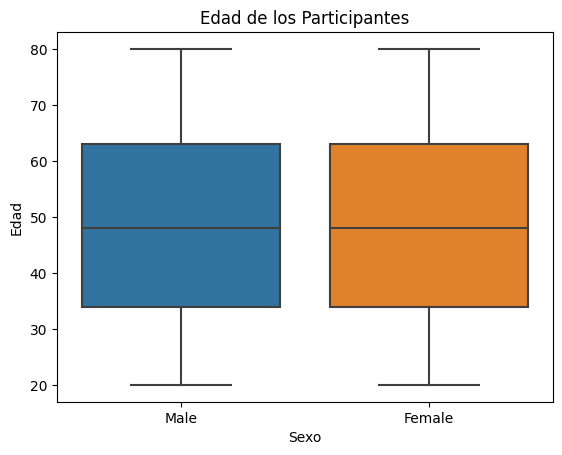

In [9]:
sns.boxplot(main_df, y="Edad", x="Sexo")

plt.title("Edad de los Participantes")
plt.xlabel("Sexo"), plt.ylabel("Edad");

- Se puede observar que la distribucion de edad es similar para ambos sexos. 
- Con una mediana en torno a los 50 años, el 50 % de la muestra se encuentra entre los 25 y 60 años (aprox). 
- Los participantes, en general, se encuentran entre los 20 y 80 años. No se observan valores atipicos.

- `Pregunta: ` Existe algun rango etareo sobre el cual sea mas prevalente el sindrome metabolico?

In [10]:
# Edad & Sindrome Metabolico
age_metabolic = main_df[['Edad', 'SinMet']]

age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
age_metabolic.loc[:,'Edad'] = pd.cut(age_metabolic['Edad'], bins=range(20,81,10), labels=age_labels)
age_metabolic = age_metabolic.groupby(['Edad', 'SinMet']).size().unstack(fill_value=0)

age_metabolic = (age_metabolic.div(age_metabolic.sum(axis=1), axis=0) * 100).round(2)
age_metabolic= age_metabolic.reset_index()

age_metabolic.columns = ['Edad', 'Negativo', 'Positivo']

print(age_metabolic)

    Edad  Negativo  Positivo
0  20-30     85.48     14.52
1  30-40     74.42     25.58
2  40-50     64.46     35.54
3  50-60     57.18     42.82
4  60-70     52.24     47.76
5  70-80     53.89     46.11


Text(0, 0.5, '% de Positivos')

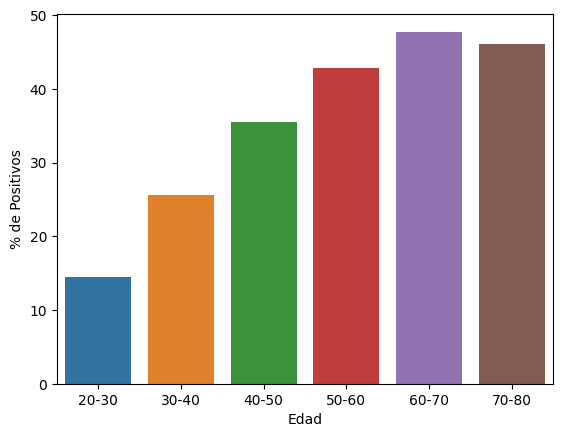

In [11]:
# Edad & Sindrome Metabolico: Grafico
sns.barplot(age_metabolic, x='Edad', y='Positivo')
plt.ylabel('% de Positivos')

Si bien el franja etarea mas afectada por el sindrome metabolico es la dispuesta entre los 60-70 años, podemos concluir que la chance de padecer aumenta con la edad.

----
----
### Analisis:

----
### `Sexo`

(Text(0.5, 0, 'Sexo'), Text(0, 0.5, 'Frecuencia'))

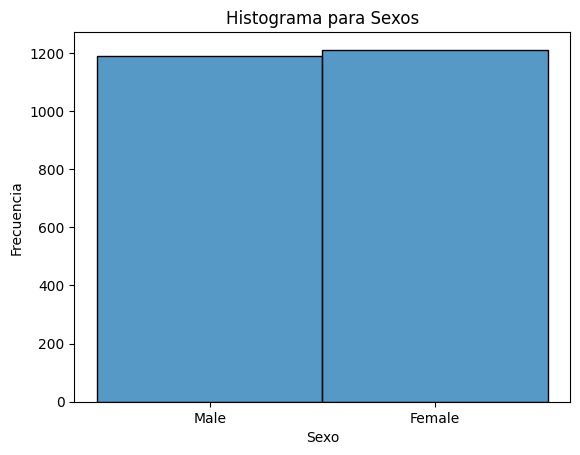

In [12]:
sns.histplot(main_df, x="Sexo")

plt.title("Histograma para Sexos")
plt.xlabel("Sexo"), plt.ylabel("Frecuencia")

- La frecuencia de ambos sexos es practicamente similar.
- `Pregunta`: La prevalencia de sindrome metabolico tambien lo es?

<Axes: xlabel='Sexo', ylabel='Count'>

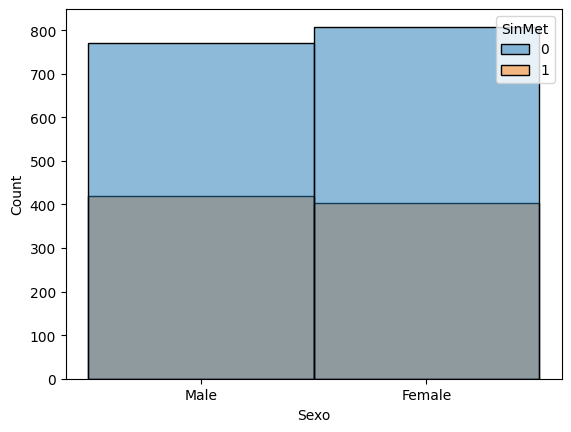

In [13]:
sns.histplot(main_df, x="Sexo", hue='SinMet')

----
### `Estado civil`

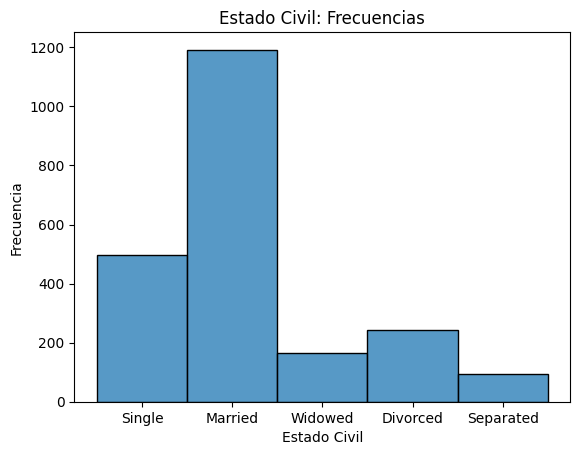

In [14]:
sns.histplot(main_df, x="Marital")

plt.title("Estado Civil: Frecuencias")
plt.xlabel("Estado Civil"), plt.ylabel("Frecuencia");

- Hay un franco predominio de individuos casados.
- Seria interesante agrupar a la muestra en solteros, casados y separados (separados, divorciados, y viudos)?

In [15]:
# Numero de participantes "separados" (separados, divorciados, y viudos)
separated  = main_df["Marital"][(main_df["Marital"] == "Widowed") | (main_df["Marital"] == "Divorced") | (main_df["Marital"] == "Separated")].count()

separated

503

In [16]:
# Porcentaje de "separados" en la muestra
(separated / main_df["Marital"].count()).round(2)

0.23

----
### `Ingresos`

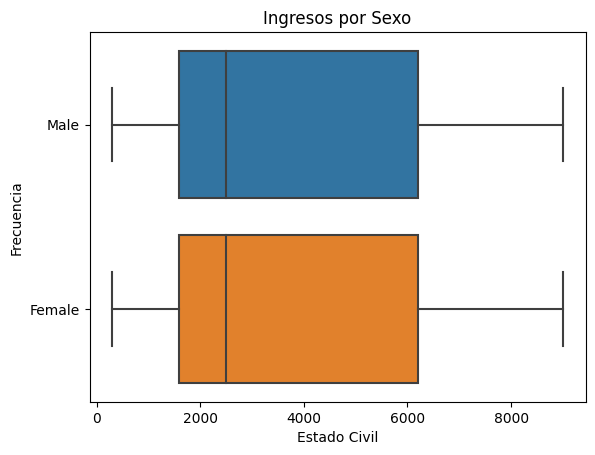

In [17]:
sns.boxplot(main_df, x="Ingresos", y="Sexo")

plt.title("Ingresos por Sexo")
plt.xlabel("Estado Civil"), plt.ylabel("Frecuencia");

- Al igual que con la edad, la distribucion de ingresos para ambos sexos es similar.

In [18]:
special_df = main_df.groupby("Sexo")["Ingresos"]

special_df.describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Female,1159.0,3916.824849,2943.454129,300.0,1600.0,2500.0,6200.0,9000.0
Male,1125.0,4096.355556,2963.438998,300.0,1600.0,2500.0,6200.0,9000.0


- Es llamativa, por lo menos, la paridad de los ingresos, en funcion del sexo, de la muestra en estudio. 

----
### `Raza`

(Text(0.5, 0, 'Razas'), Text(0, 0.5, 'Frecuencia'))

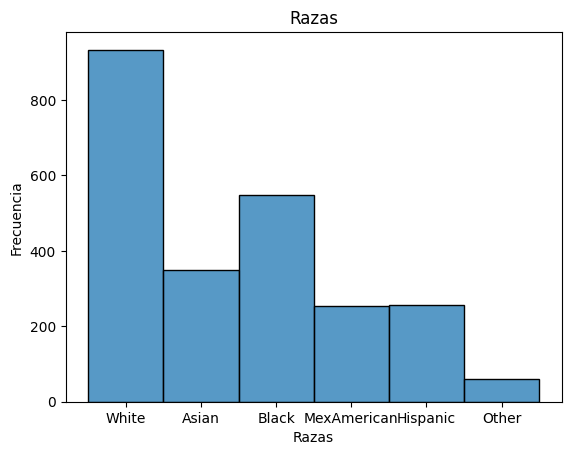

In [19]:
sns.histplot(main_df, x="Raza")

plt.title("Razas")
plt.xlabel("Razas"), plt.ylabel("Frecuencia")

- La etnia predominante es la blanca.
- `Pregunta:` Cual es la relacion de las diferentes etnias con el sindrome metabolico?

c:\Users\nical\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


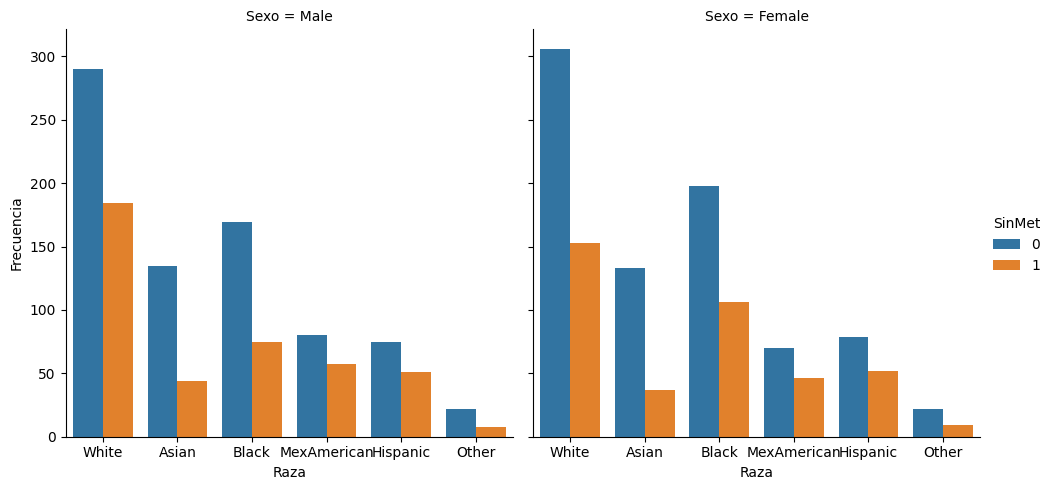

In [20]:
fig = sns.catplot(main_df, x='Raza', kind='count', col='Sexo', hue='SinMet')
fig.set_ylabels('Frecuencia'); fig.set_xlabels('Raza')

No se observan diferencias importantes en la prevalencia de sindrome metabolico cuando se comparan las etnias en funcion del sexo.

----
### `Circunferencia Abdominal`

(Text(0.5, 0, 'Circunferencia Abdominal (cm)'), Text(0, 0.5, 'Sexo'))

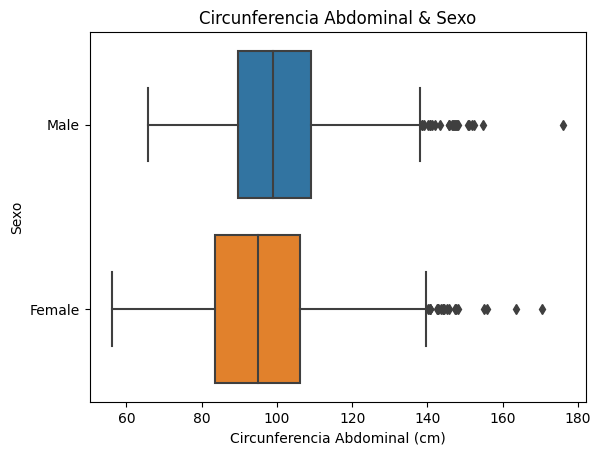

In [21]:
sns.boxplot(main_df, x="CirAbd", y="Sexo")

plt.title("Circunferencia Abdominal & Sexo")
plt.xlabel("Circunferencia Abdominal (cm)"), plt.ylabel("Sexo")

In [22]:
# TODO Removiendo los valores atipicos: Circunferencia Abdominal

In [23]:
# En general, se pueden encontrar las siguientes medidas
main_df["CirAbd"].describe()

count    2316.000000
mean       98.307254
std        16.252634
min        56.200000
25%        86.675000
50%        97.000000
75%       107.625000
max       176.000000
Name: CirAbd, dtype: float64

In [24]:
main_df.groupby("Sexo")["CirAbd"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Female,1162.0,96.341566,16.504544,56.2,83.625,95.0,106.2,170.5
Male,1154.0,100.286568,15.756044,65.8,89.600,99.0,109.0,176.0


- Las mujeres presentan valores minimos mas bajos que los hombres.
- Sin embargo, a medida que los valores incrementan, se vuelven similares.
- `Pregunta:` Existe alguna relacion entre el peso y la edad? Entre el peso y la etnia?

----
### `Indice de Masa Corporal`

(Text(0.5, 0, 'IMC'), Text(0, 0.5, 'Sexo'))

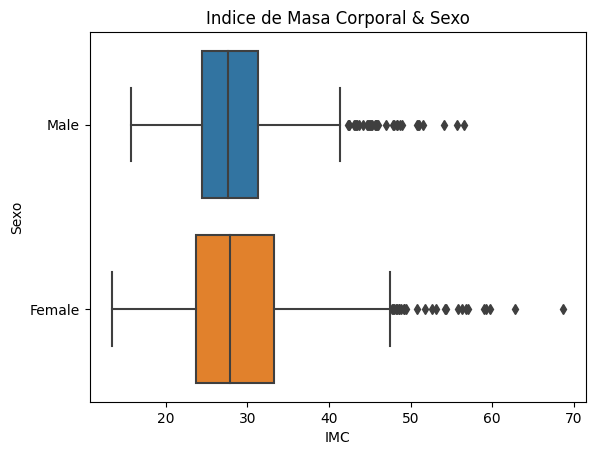

In [25]:
sns.boxplot(main_df, x="IMC", y="Sexo")

plt.title("Indice de Masa Corporal & Sexo")
plt.xlabel("IMC"), plt.ylabel("Sexo")

In [26]:
# TODO Removiendo los valores atipicos: IMC

In [27]:
main_df.groupby("Sexo")["IMC"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Female,1197.0,29.040267,7.323734,13.4,23.7,27.9,33.3,68.7
Male,1178.0,28.358659,5.898125,15.7,24.4,27.6,31.3,56.6


- Las mujeres presentan no solo un rango mayor, sino una mayor dispersion de los datos.
- Ademas, presentan valores atipicos que superan a los propios del hombre.
- `Pregunta:` Existe alguna relacion entre el IMC y la edad?

<Axes: xlabel='IMC', ylabel='Edad'>

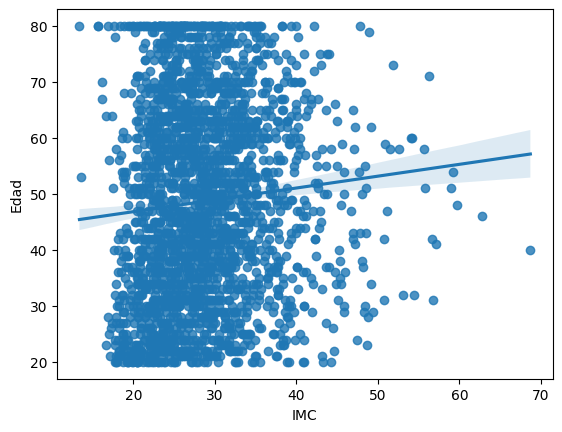

In [28]:
sns.regplot(main_df, x="IMC", y="Edad")

- Existen una ligera correlacion positiva entre la edad y el IMC.
- `Pregunta`: Dicha tendencia se acentua en algun sexo?

In [29]:
male_df = main_df[main_df["Sexo"] == "Male"]
female_df = main_df[main_df["Sexo"] == "Female"]

<Axes: xlabel='IMC', ylabel='Edad'>

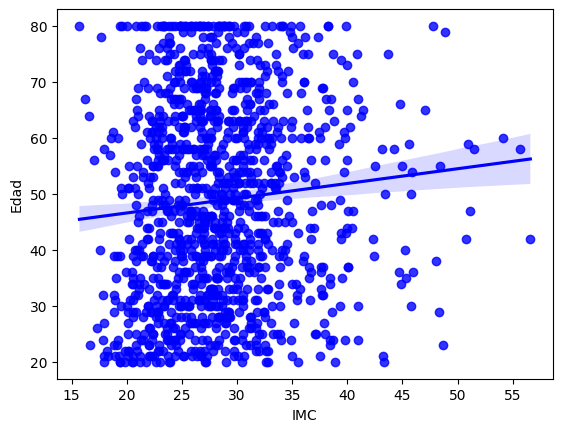

In [30]:
sns.regplot(male_df, x="IMC", y="Edad", color="Blue")

<Axes: xlabel='IMC', ylabel='Edad'>

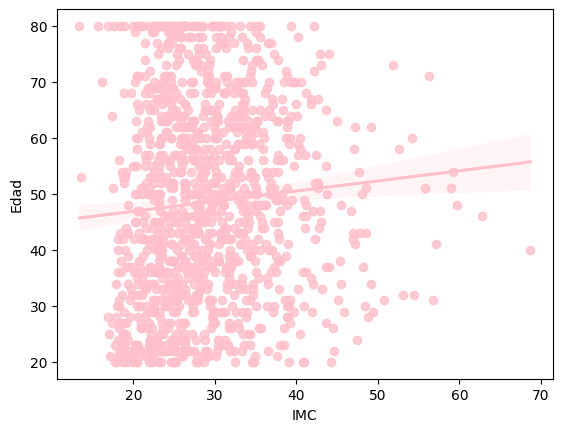

In [31]:
sns.regplot(female_df, x="IMC", y="Edad", color="Pink")

In [32]:
# TODO Agrupar los 2 graficos anteriores en un solo canvas

- No parece que la correlacion este asociada a algun sexo especifico.

----
### `Albuminuria`

([<matplotlib.axis.XTick at 0x25ab2e87bd0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

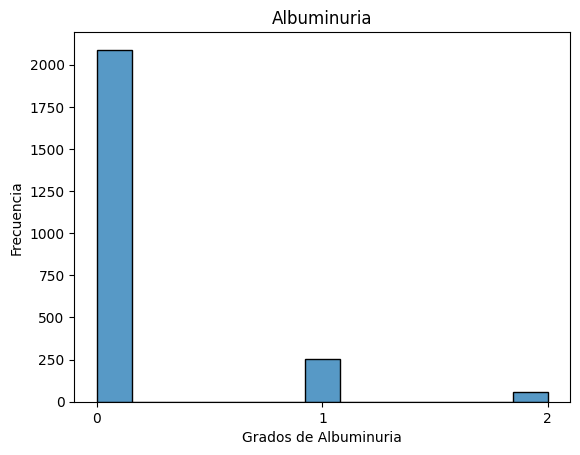

In [33]:
sns.histplot(main_df, x="Albuminuria")

plt.title("Albuminuria")
plt.xlabel("Grados de Albuminuria"), plt.ylabel("Frecuencia")
plt.xticks([0,1,2])

- La mayoria de los individuos no presenta albuminuria.
- `Pregunta:` Existe alguna relacion entre la albuminuria y la glucosa en sangre?

<Axes: xlabel='Glucemia', ylabel='Albuminuria'>

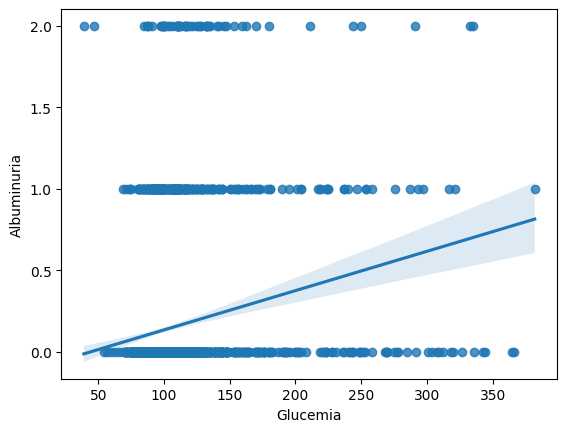

In [34]:
sns.regplot(main_df, x="Glucemia", y="Albuminuria")

- Existe una notable correlacion positiva entre la glucosa en sangre y la presencia de albumina en la orina.

In [35]:
# TODO Removiendo los valores atipicos: Albuminuria

----
### `Relacion Albumina/Creatina`

(Text(0.5, 0, 'Albumina/Creatina'), Text(0, 0.5, 'Sexo'))

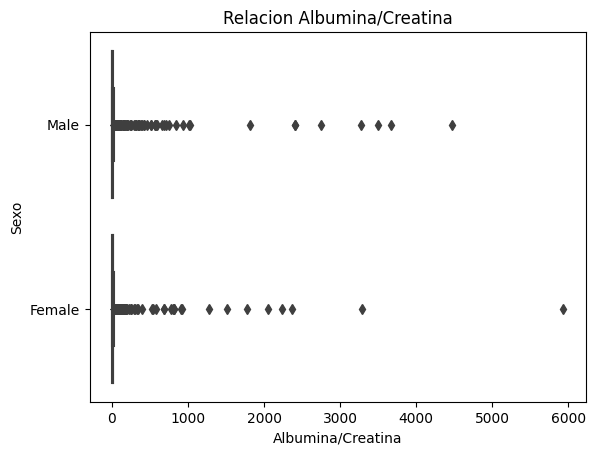

In [36]:
sns.boxplot(main_df, x="Alb/Cre", y="Sexo")

plt.title("Relacion Albumina/Creatina")
plt.xlabel("Albumina/Creatina"), plt.ylabel("Sexo")

- Se puede observar claramente la existencia de valores atipicos extremos.
- A su vez, dichos valores dificultan la interpretacion de los valores tipicos.

(Text(0.5, 0, 'Albumina/Creatina'), Text(0, 0.5, 'Sexo'))

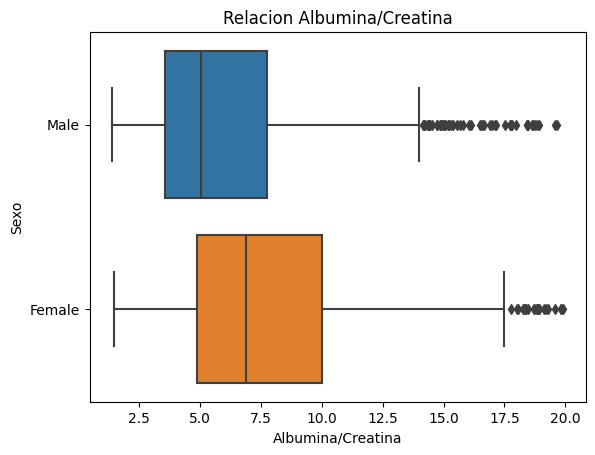

In [37]:
# Limitando la expresion de valores atipicos
sns.boxplot(main_df, x=main_df["Alb/Cre"][main_df["Alb/Cre"] < 20], y="Sexo")

plt.title("Relacion Albumina/Creatina")
plt.xlabel("Albumina/Creatina"), plt.ylabel("Sexo")

- Cuando se limitan los datos a aquellos menores de 20, se puede observar mejor las tendencias.
- Reproduciendo pautas anteriores, la mujer presenta una mayor dispersion de sus datos.
- Ademas, las mujeres presentan un mayor rango.
- `Pregunta:` Al igual que con la albuminuria, la relacion urinaria de albumina/creatina se correlaciona con la de glucemia?

<Axes: xlabel='Glucemia', ylabel='Alb/Cre'>

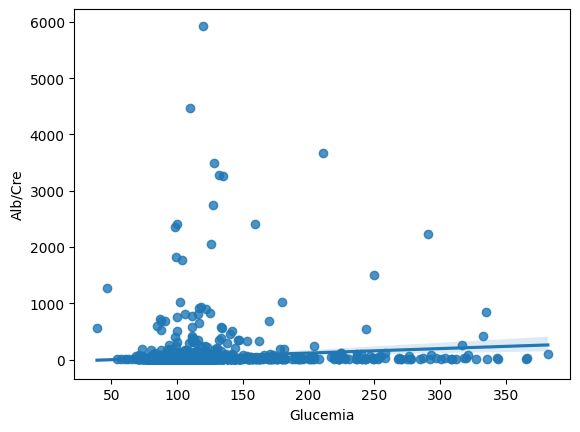

In [38]:
sns.regplot(main_df, x="Glucemia", y="Alb/Cre")

- En este caso, la correlacion, si bien positiva, es minima.
- `Pregunta:` Y si se desprecian los datos atipicos?

<Axes: xlabel='Glucemia', ylabel='Alb/Cre'>

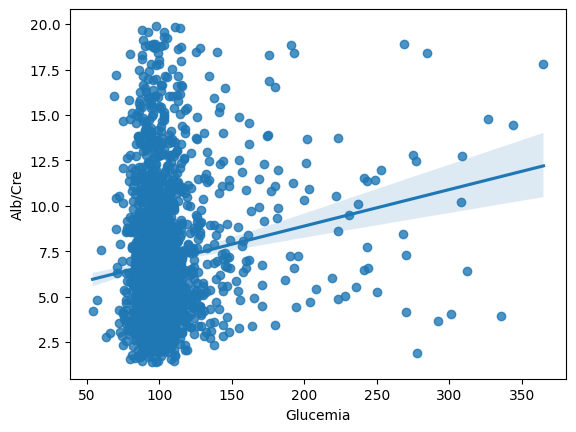

In [39]:
sns.regplot(main_df[main_df["Alb/Cre"] < 20], x="Glucemia", y="Alb/Cre")

- Efectivamente, la tendencia a la correlacion positiva mejora cuando se eliminan de la muestra los valores extremos.

In [40]:
# TODO Removiendo los valores atipicos: Alb/Cre

----
### `Uricosuria`

(Text(0.5, 0, 'Uricosuria'), Text(0, 0.5, 'Sexo'))

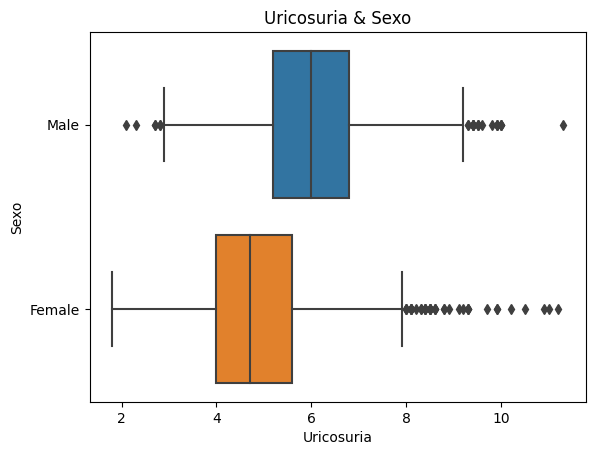

In [41]:
sns.boxplot(main_df, x="Uricosuria", y="Sexo")

plt.title("Uricosuria & Sexo")
plt.xlabel("Uricosuria"), plt.ylabel("Sexo")

- En contraste con el resto de los casos, es la primera vez que los hombres

In [42]:
# TODO Removiendo los valores atipicos: Uricosuria

----
### `Glucemia`

(Text(0.5, 0, 'Sexo'), Text(0, 0.5, 'Sexo'))

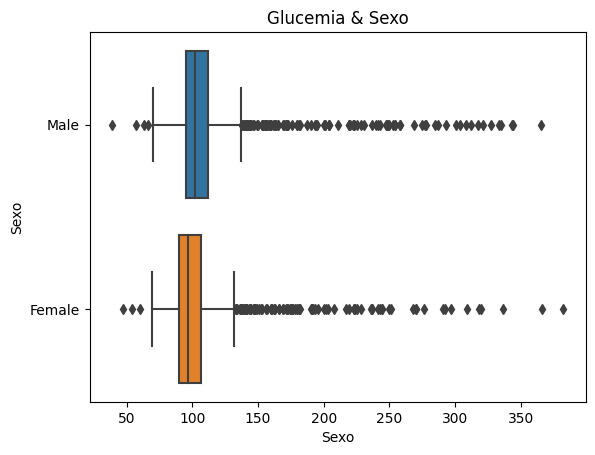

In [43]:
sns.boxplot(main_df, x="Glucemia", y='Sexo')

plt.title("Glucemia & Sexo")
plt.xlabel("Sexo"), plt.ylabel("Sexo")

In [44]:
# TODO Removiendo los valores atipicos: Glucemia

----
### `HDL`

(Text(0.5, 0, 'HDL (mg/dL)'), Text(0, 0.5, 'Sexo'))

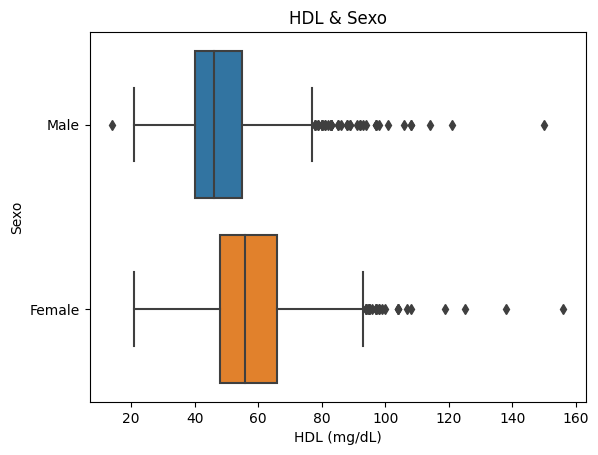

In [45]:
sns.boxplot(main_df, x="HDL", y='Sexo')

plt.title("HDL & Sexo")
plt.xlabel("HDL (mg/dL)"), plt.ylabel("Sexo")

In [46]:
# TODO Removiendo los valores atipicos: HDL

----
### `Trigliceridemia`

(Text(0.5, 0, 'Trigliceridemia (mg/dL)'), Text(0, 0.5, 'Sexo'))

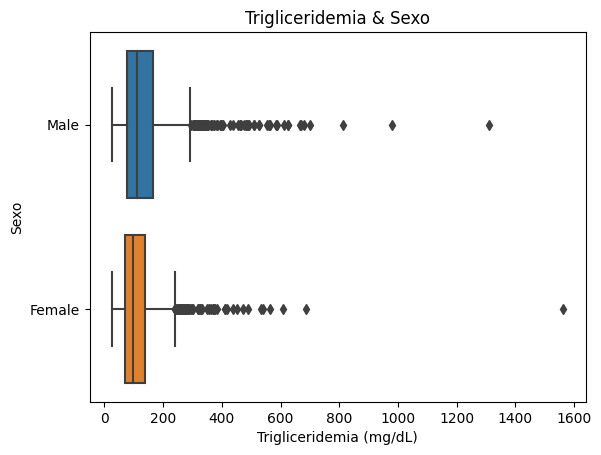

In [47]:
sns.boxplot(main_df, x="Trigliceridemia", y="Sexo")

plt.title("Trigliceridemia & Sexo")
plt.xlabel("Trigliceridemia (mg/dL)"), plt.ylabel("Sexo")

In [48]:
# TODO Removiendo los valores atipicos: Trigliceridemia
triglycerides_inliers = main_df["Trigliceridemia"][main_df["Trigliceridemia"] < 250]

(Text(0.5, 0, 'Trigliceridemia'), Text(0, 0.5, 'Sexo'))

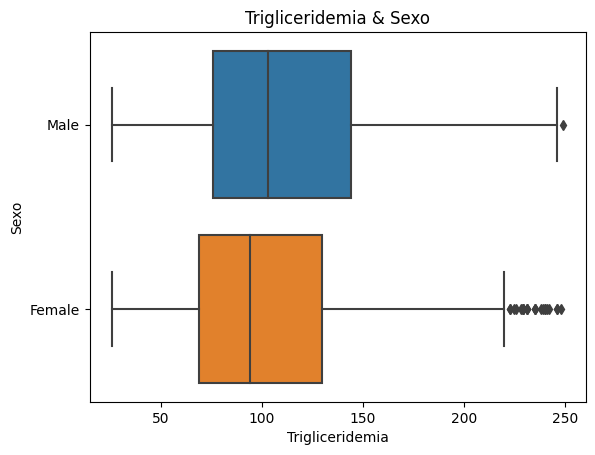

In [49]:
sns.boxplot(main_df, x=triglycerides_inliers, y="Sexo")

plt.title("Trigliceridemia & Sexo")
plt.xlabel("Trigliceridemia"), plt.ylabel("Sexo")

----
----
### Analisis: `Multivariados`

In [50]:
# TODO Heatmap de correlaciones


----
----
## `Modelo Predictivo`

In [51]:
# Funciones que estimo voy a necesitar varias veces

# TODO Compactar calculate_reduction
def calculate_reduction(before_data, after_data):
    
    before_shape = before_data.shape
    after_shape = after_data.shape
    row_reduction = before_shape[0] - after_shape[0]
    col_reduction = before_shape[1] - after_shape[1]
    row_reduction_percentage = row_reduction / before_shape[0]
    col_reduction_percentage = col_reduction / before_shape[1]
    
    print('Calculate Reduction:')
    print(f" DataFrame Original: {before_shape}")
    print(f" DataFrame Modificado: {after_shape}")
    print(f" Filas removidas: {row_reduction} ({row_reduction_percentage:.2f})")
    print(f" Columnas removidas: {col_reduction} ({col_reduction_percentage:.2f})")

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def detailed_classification_report(val_y, predicted_y):
    precision_positiva = precision_score(val_y, predicted_y, pos_label=1)
    precision_negativa = precision_score(val_y, predicted_y, pos_label=0)
    recall_sensibilidad = recall_score(val_y, predicted_y, pos_label=1)
    recall_especificidad= recall_score(val_y, predicted_y, pos_label=0)
    f1_positivo = f1_score(val_y, predicted_y, pos_label=1)
    f1_negativo = f1_score(val_y, predicted_y, pos_label=0)
    accuracy = accuracy_score(val_y, predicted_y)

    return [precision_negativa, precision_positiva, recall_sensibilidad, recall_especificidad, f1_positivo, f1_negativo, accuracy]

In [53]:
def get_detailed_classification_report(max_leaf_nodes, train_X, val_X, train_y, val_y):

    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=46)
    model.fit(train_X, train_y)
    predicted_y = model.predict(val_X)
    
    return detailed_classification_report(val_y, predicted_y)

In [54]:
# Residuo

# def get_mean_absolute_error(max_leaf_nodes, train_X, val_X, train_y, val_y):

#     model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=46)
#     model.fit(train_X, train_y)
#     predicted_y = model.predict(val_X)
    
#     return mean_absolute_error(val_y, predicted_y)

----
### 1ra Aproximacion: `Decision Tree Classifier`

In [55]:
# Registro para comparar las diferentes aproximaciones:
models_scores = []

In [56]:
# Preprocesamiento

# Copiando los datos originales a una nueva variable para no afectarlos en esta experimentacion
model_df = main_df.copy()

# Quitando filas con valores NaN
model_df = model_df.dropna(axis=0)
calculate_reduction(main_df, model_df)

Calculate Reduction:
 DataFrame Original: (2401, 14)
 DataFrame Modificado: (2009, 14)
 Filas removidas: 392 (0.16)
 Columnas removidas: 0 (0.00)


In [57]:
# Definiendo label y features

# Definiendo la variable objetivo (label = y)
prediction_target = y = model_df['SinMet']

# Definiendo las variables predictoras (features = X): totalmente arbitrario!
model_features = ['CirAbd', 'IMC', 'Glucemia', 'Trigliceridemia', 'HDL']
X = model_df[model_features]

# Comprobando el resultado
X.head(5)

,CirAbd,IMC,Glucemia,Trigliceridemia,HDL
0,81.0,23.3,92,84,41
1,80.1,23.2,82,56,28
2,69.6,20.1,107,78,43
3,120.4,33.3,104,141,73
5,112.5,28.5,105,100,47


In [58]:
# Creando el modelo
metabolic_model = DecisionTreeClassifier(random_state=46)

# Discriminando datos de entrenamiento y validacion
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state=46)

# Fitting
metabolic_model.fit(train_X, train_y)

# Predicting
predicted_y = metabolic_model.predict(valid_X)

# Infome de Clasificacion
to_register = detailed_classification_report(valid_y, predicted_y)
print(classification_report(valid_y, predicted_y))

# print(f"El error del Modelo Predictivo fue de {error:.2f}")
# TODO resumir todo lo anterior en una funcion para reducir codigo

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       329
           1       0.72      0.76      0.74       174

    accuracy                           0.82       503
   macro avg       0.79      0.80      0.80       503
weighted avg       0.82      0.82      0.82       503



In [59]:
# Registro: Decision Tree Classifier (Basico)
to_register.insert(0, 'Decision Tree Classifier (Basico)')
models_scores.append(to_register)
# TODO Reducir lo anterior en una funcion

# model_scores_columns = 'Precision 0, Precision 1, Sensibilidad, Especificidad, f1-score 0, f1-score 1, accuracy'.split(', ')
# models_scores.columns = model_scores_columns

In [60]:
# Residuo

# Registro: Decision Tree Regressor (Basico)
# models_scores.append(('DecisionTreeRegressor', round(error, 4)))

# models_scores

In [61]:
# Residuo

# Buscando el punto de equilibrio para la relacion underfitting/overfitting
# get_mean_absolute_error_register = []
# for max_leaf_nodes in range(2,100):
#     instance_mae = get_mean_absolute_error(max_leaf_nodes, train_X, valid_X, train_y, valid_y)
#     get_mean_absolute_error_register.append([max_leaf_nodes, instance_mae])

# register_data = pd.DataFrame(get_mean_absolute_error_register, columns=['Leaves', 'MAE'])
# best_register = register_data.nsmallest(1, 'MAE').iloc[0]

# print(f" Mejor Rendimiento = {best_register[1]:.2f} -> N° de Hojas = {best_register[0]}")

In [62]:
# Buscando el punto de equilibrio para la relacion underfitting/overfitting
detailed_classification_report_register = []
for max_leaf_nodes in range(2,100):
    instance_dcr = get_detailed_classification_report(max_leaf_nodes, train_X, valid_X, train_y, valid_y)
    
    instance_dcr.insert(0, max_leaf_nodes)
    detailed_classification_report_register.append(instance_dcr)

model_scores_columns = 'Leaves, Precision 0, Precision 1, Sensibilidad, Especificidad, f1-score 0, f1-score 1, accuracy'.split(', ')
register_data = pd.DataFrame(detailed_classification_report_register, columns=model_scores_columns)

best_register = register_data.loc[register_data['f1-score 1'].idxmax()]

In [63]:
# Los mejores 5 rendimientos en funcion de F1-Scores
register_data.nlargest(5, ['f1-score 1', 'f1-score 0'])

,Leaves,Precision 0,Precision 1,Sensibilidad,Especificidad,f1-score 0,f1-score 1,accuracy
13,15,0.905488,0.817143,0.821839,0.902736,0.819484,0.904110,0.874751
18,20,0.897590,0.818713,0.804598,0.905775,0.811594,0.901664,0.870775
19,21,0.897590,0.818713,0.804598,0.905775,0.811594,0.901664,0.870775
14,16,0.900000,0.815029,0.810345,0.902736,0.812680,0.901366,0.870775
15,17,0.900000,0.815029,0.810345,0.902736,0.812680,0.901366,0.870775


Text(0, 0.5, 'F1-Score (-)')

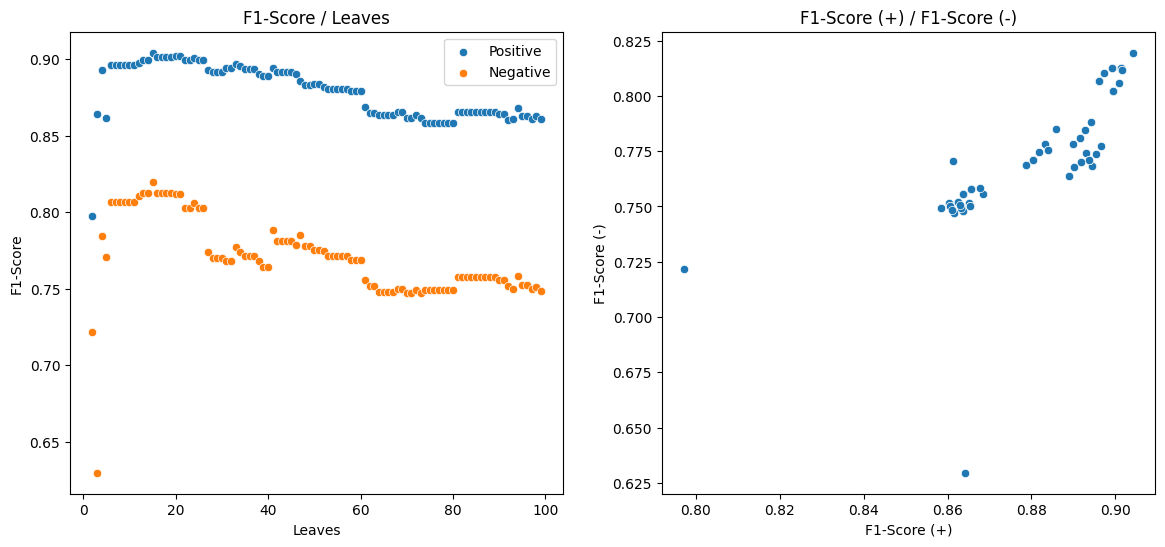

In [64]:
# Graficos: underfitting/overfitting
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.scatterplot(register_data, x=register_data['Leaves'], y=register_data['f1-score 1'], label = 'Positive', ax=ax1)
sns.scatterplot(register_data, x=register_data['Leaves'], y=register_data['f1-score 0'], label = 'Negative', ax=ax1)

ax1.set_title('F1-Score / Leaves')
ax1.set_xlabel('Leaves')
ax1.set_ylabel('F1-Score')

# TODO ¿Deberia comparar la relacion +/- sobre el numbero de hojas?
sns.scatterplot(register_data, x=register_data['f1-score 1'], y=register_data['f1-score 0'], ax=ax2)

ax2.set_title('F1-Score (+) / F1-Score (-)')
ax2.set_xlabel('F1-Score (+)')
ax2.set_ylabel('F1-Score (-)')

In [65]:
best_register[0] = f"Decision Tree Classifier (Ajustado)"

C:\Users\nical\AppData\Local\Temp\ipykernel_10588\4030596340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_register[0] = f"Decision Tree Classifier (Ajustado)"


In [66]:
# Registro: Decision Tree Classifier (Ajustado)
models_scores.append(best_register.tolist())

----
### 2da Aproximacion: `Random Forest Regressor`

In [67]:
# Creando el modelo
metabolic_model = RandomForestClassifier(random_state=46)

# Discriminando datos de entrenamiento y validacion
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state=46)

# Fitting
metabolic_model.fit(train_X, train_y)

# Predicting
predicted_y = metabolic_model.predict(valid_X)

# Infome de Clasificacion
to_register = detailed_classification_report(valid_y, predicted_y)
print(classification_report(valid_y, predicted_y))

# TODO Reemplazar por la funcion que ya deberias haber creado

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       329
           1       0.86      0.78      0.82       174

    accuracy                           0.88       503
   macro avg       0.87      0.86      0.86       503
weighted avg       0.88      0.88      0.88       503



In [68]:
# Registro: Random Forest Classifier (Basico)
to_register.insert(0, 'Random Forest Classifier (Basico)')
models_scores.append(to_register)
# TODO Reducir lo anterior en una funcion

----
### 3ra Aproximacion: `Manejo de Missing Values`

In [69]:
# Copiando los datos originales a una nueva variable para no afectarlos en esta experimentacion
imputed_model_df = main_df.copy()

In [70]:
# Definiendo label y features

# Definiendo la variable objetivo (label = y)
prediction_target = y = imputed_model_df['SinMet']

# Definiendo las variables predictoras (features = X): totalmente arbitrario!
model_features = ['CirAbd', 'IMC', 'Glucemia', 'Trigliceridemia', 'HDL']
X = imputed_model_df[model_features]

# Comprobando el resultado
X.head(5)

,CirAbd,IMC,Glucemia,Trigliceridemia,HDL
0,81.0,23.3,92,84,41
1,80.1,23.2,82,56,28
2,69.6,20.1,107,78,43
3,120.4,33.3,104,141,73
4,81.1,20.1,95,126,43


In [71]:
print(f"Datos Faltantes \n{X.isnull().sum()}")

Datos Faltantes 
CirAbd             85
IMC                26
Glucemia            0
Trigliceridemia     0
HDL                 0
dtype: int64


In [72]:
# Imputaciones
imputer = SimpleImputer(strategy='most_frequent')

X_IMPUTED = pd.DataFrame(imputer.fit_transform(X))

X_IMPUTED.columns = X.columns

calculate_reduction(X, X_IMPUTED)

Calculate Reduction:
 DataFrame Original: (2401, 5)
 DataFrame Modificado: (2401, 5)
 Filas removidas: 0 (0.00)
 Columnas removidas: 0 (0.00)


In [73]:
# Creando el modelo
metabolic_model = RandomForestClassifier(random_state=46)

# Discriminando datos de entrenamiento y validacion
train_X, valid_X, train_y, valid_y = train_test_split(X_IMPUTED, y, random_state=46)

# Fitting -> REEMPLAZADOS POR VALORES IMPUTADOS
metabolic_model.fit(train_X, train_y)

# Predicting
predicted_y = metabolic_model.predict(valid_X)

# Infome de Clasificacion
to_register = detailed_classification_report(valid_y, predicted_y)
print(classification_report(valid_y, predicted_y))

# TODO Crear una funcion que resuma toda esta etapa

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       396
           1       0.78      0.72      0.75       205

    accuracy                           0.84       601
   macro avg       0.82      0.81      0.81       601
weighted avg       0.83      0.84      0.83       601



In [74]:
# Registro: Random Forest Classifier (Imputed)
to_register.insert(0, 'Random Forest Classifier (Imputed)')
models_scores.append(to_register)
# TODO Reducir lo anterior en una funcion

----
### 4ta Aproximacion: Utilizando `Wrapping Methods`

In [75]:
# Reduccion del Modelo a una Funcion
def random_forest_classifier(X, y):
    
    metabolic_model = RandomForestClassifier(random_state=46)
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state=46)
    metabolic_model.fit(train_X, train_y)
    predicted_y = metabolic_model.predict(valid_X)
    report = detailed_classification_report(valid_y, predicted_y)

    return report

In [76]:
# En lugar de elegir arbitrariamente el numero de features a considerar, probar todas las posibilidades
X_columns = X_IMPUTED.shape[1] + 1

print('Metodo: Forward Selection')

results_register = []; combinations_register = []; index=0
for k_features in range(2, X_columns):
    sequencer = SFS(LinearRegression(), k_features=k_features, forward=True, floating=False, scoring='r2', cv=0)
    sequencer.fit(X_IMPUTED, y)
    best_features = list(sequencer.k_feature_names_)

    results = random_forest_classifier(X_IMPUTED[best_features], y)
    results_register.append(results)
    combinations_register.append(best_features)

    rounded_results = [round(result, 4) for result in results]
    print(f"{index} Features: {best_features}\n\tReport: {rounded_results}")
    index += 1

# best_register = sorted(results_register.items())[0]
# print(f"\nMejor combiniacion: {best_register}")

Metodo: Forward Selection


0 Features: ['CirAbd', 'Trigliceridemia']
	Report: [0.8087, 0.622, 0.6341, 0.8005, 0.628, 0.8046, 0.7438]
1 Features: ['CirAbd', 'Glucemia', 'Trigliceridemia']
	Report: [0.8621, 0.7641, 0.7268, 0.8838, 0.745, 0.8728, 0.8303]
2 Features: ['CirAbd', 'Glucemia', 'Trigliceridemia', 'HDL']
	Report: [0.8654, 0.8054, 0.7268, 0.9091, 0.7641, 0.8867, 0.8469]
3 Features: ['CirAbd', 'IMC', 'Glucemia', 'Trigliceridemia', 'HDL']
	Report: [0.8596, 0.7819, 0.7171, 0.8965, 0.7481, 0.8776, 0.8353]


In [77]:
to_register = pd.DataFrame(results_register, columns=model_scores_columns[1:])
to_register = list(to_register.loc[to_register['f1-score 1'].idxmax()])

In [78]:
# Registro: Random Forest Classifier (Forward Selection)
to_register.insert(0, 'Random Forest Classifier (Forward Selection)')
models_scores.append(to_register)
# TODO Reducir lo anterior en una funcion

----
### Conclusiones

In [79]:
model_to_pandas = []
for model in models_scores:
    model_name = model[:1][0]
    model_results = [round(result, 4) for result in model[1:]]
    
    model_to_pandas.extend([model[:1] + model_results])

columns = 'Model, Precision 0, Precision 1, Sensibilidad, Especificidad, F1-score 0, F1-score 1, Accuracy'.split(', ')
models_comparation = pd.DataFrame(model_to_pandas, columns=columns)

models_comparation.set_index('Model')

,Precision 0,Precision 1,Sensibilidad,Especificidad,F1-score 0,F1-score 1,Accuracy
Model,,,,,,,
Decision Tree Classifier (Basico),0.8711,0.7189,0.7644,0.8419,0.7409,0.8563,0.8151
Decision Tree Classifier (Ajustado),0.9055,0.8171,0.8218,0.9027,0.8195,0.9041,0.8748
Random Forest Classifier (Basico),0.8895,0.8553,0.7816,0.9301,0.8168,0.9094,0.8787
Random Forest Classifier (Imputed),0.8596,0.7819,0.7171,0.8965,0.7481,0.8776,0.8353
Random Forest Classifier (Forward Selection),0.8654,0.8054,0.7268,0.9091,0.7641,0.8867,0.8469


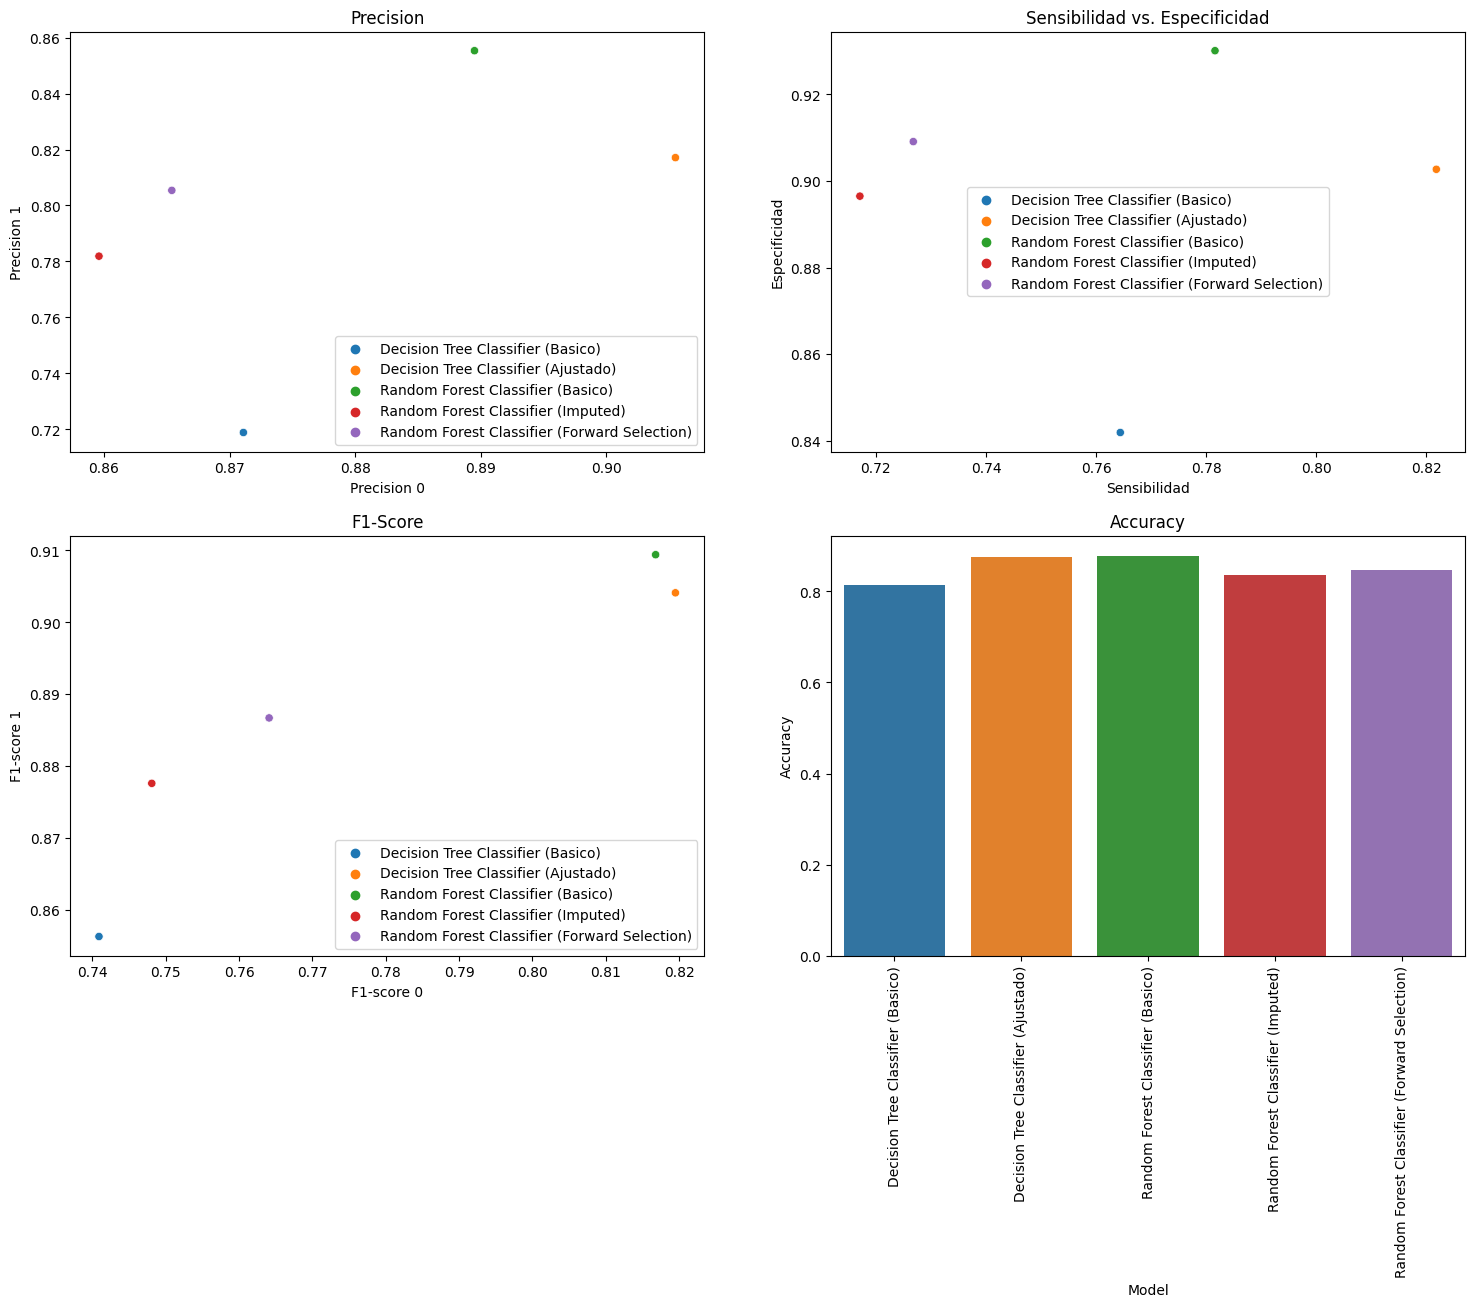

In [86]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,12))

sns.scatterplot(models_comparation, x='Precision 0', y='Precision 1', hue='Model', ax=ax1)
ax1.set_title('Precision')
ax1.legend(loc="lower right")

sns.scatterplot(models_comparation, x='Sensibilidad', y='Especificidad', hue='Model', ax=ax2)
ax2.set_title('Sensibilidad vs. Especificidad')
ax2.legend(loc="center")

sns.scatterplot(models_comparation, x='F1-score 0', y='F1-score 1', hue='Model', ax=ax3)
ax3.set_title('F1-Score')
ax3.legend(loc="lower right")

sns.barplot(models_comparation, y='Accuracy', x='Model', ax=ax4)
ax4.set_title('Accuracy')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90);

# TODO Aprender como poner una leyenda en lugar de las largas etiquetas en el ultimo grafico

----
----
### Conclusiones
----
#### Marco Teorico

Un resultado positivo indica que el modelo lo detecto como tal, pero no necesariamente que en esencia lo sea. Cuando la deteccion se condice con la esencia, se lo refiere como *verdadero positivo* (VP); cuando no, como *falso positivo* (FP). Lo mismo sucede con las resultados negativos: pueden *efectivamente serlos* (VN), o representar un *error del modelo* (FN).

- `Precision`: Tambien denominada *Valor Predictivo Positivo/Negativo*. Indica la capacidad del modelo para detectar Verdaderos Positivos/Negativos entre los Positivos/Negativos Totales (VP + Falsos Positivos; VN + Falsos Negativos). A mayor valor, menor la tasa de falsos resultados. **Cuando la distribucion de clases es desigual, tiende a sesgarse por la predominante**.
- `Sensibilidad`: Tambien denominada *Tasa de Verdaderos Positivos*. Indica la capacidad del modelo para detectar valores efectivamente positivos para una variable. *Verdaderos Positivos / VP + Falsos Negativos*.
- `Efectividad`: Tambien denominada *Tasa de Verdaderos Negativos*. Indica la capacidad del modelo para detectar valores efectivamente negativos para una variable. *Verdaderos Negativos / VN + Falsos Positivos*
- `Exactitud` (Accuracy): Capacidad general del modelo para acertar. (Resultados Verdaderos / Total, donde RS = Verdaderos Positivos + VN).
- `F1-Score`: Combina Precision y Sensibilidad. A mayor valor, menor tasa de falsos resultados.

----
#### Contexto
El objetivo fundamental de esta etapa es conocer las herramientas. Se hizo un analisis comparativo de las mismas.  

#### Modelos
1. Decision Tree Classifier Basico.
2. Decision Tree Classifier Ajustado.
3. Random Forest Classifier Basico.
4. Random Forest Classifier con Imputaciones.
5. Random Forest Classifier con seleccion de variables a traves de Forward Selection.

In [81]:
models_comparation.index = models_comparation.index + 1

In [82]:
models_comparation

,Model,Precision 0,Precision 1,Sensibilidad,Especificidad,F1-score 0,F1-score 1,Accuracy
1,Decision Tree Classifier (Basico),0.8711,0.7189,0.7644,0.8419,0.7409,0.8563,0.8151
2,Decision Tree Classifier (Ajustado),0.9055,0.8171,0.8218,0.9027,0.8195,0.9041,0.8748
3,Random Forest Classifier (Basico),0.8895,0.8553,0.7816,0.9301,0.8168,0.9094,0.8787
4,Random Forest Classifier (Imputed),0.8596,0.7819,0.7171,0.8965,0.7481,0.8776,0.8353
5,Random Forest Classifier (Forward Selection),0.8654,0.8054,0.7268,0.9091,0.7641,0.8867,0.8469


----
#### Resultados
- En lineas generales, se observan 2 grupos de modelos. El primero, con mejores metricas, esta integrado por 2 y 3. El segundo por el resto.
- Dicha primacia podria explicarse por lo limitado del modelo 1, y la imputacion necesaria para los modelos 4 y 5. 
    - El modelo 1 estaria limitado al no ajustar el numero de divisiones a un grado optimo (como si lo hace el modelo 2).
    - Los modelos 4 y 5 podrian estar afectado por la imputacion, ya que los datos originales no tienen manejo de valores atipicos que podrian estar alterando los valores de tendencia central.
- El modelo 2 seria superior al modelo 3 por los diferentes manejos de los datos. Podria darse que el modelo mas simple (Decision Tree), al limitarse a un solo subconjunto de datos (y datos que ademas presentan valores atipicos muy extremos), haya dado con un subconjunto "favorable". En cambio, el modelo 3, al combinar multiples "arboles" reduce el overfitting. Podria suponerse que si bien el primero performa mejor en el entrenamiento, fallaria con valores reales.

In [83]:
# Modificaciones Futuras
# TODO Aprender como hacer una referencia a pie de pagina (celda) usando Markdown.
# TODO Aprender como hacer tablas con Markdonw.
# TODO Debajo del cuadro models_comparation, indicar el modelo de imputacion y las variables favorecidas por el forward selection.
# TODO En lugar de recoger valores y transcribirlos, escribir que codigo que los tome automaticamente

In [84]:
# Mejoras Futuras
# TODO Resolver la presencia de valores atipicos, que estarian afectando el rendimiento de los modelos.

In [85]:
# Futuras Caracteristicas
# TODO Agregar un modelo predictivo para variables continuas. Precisamente, que permita predecir parametros bioquimicos a partir de caracteristicas facilmente observable (peso, cintura, raza, estado civil, edad, etc)